In [2]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
series = np.sin(0.1*np.arange(200))

In [4]:
print(len(series))

200


In [5]:
import tensorflow as tf
print(tf.__version__)

2.1.0


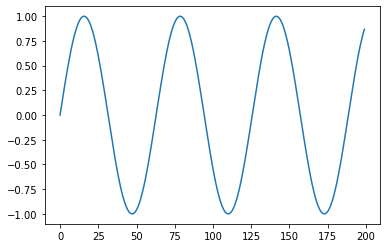

In [6]:
plt.plot(series)

Text(0, 0.5, 'sin(x)')

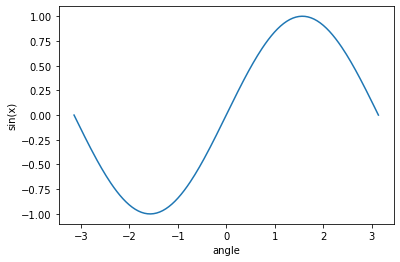

In [7]:
x = np.linspace(-np.pi, np.pi, 200)
plt.plot(x,np.sin(x))
plt.xlabel('angle')
plt.ylabel('sin(x)')

In [8]:
T = 10
X = []
Y = []

for t in range(len(series)-T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
    
X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)

print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10) Y.shape (190,)


In [9]:
print(N)

190


In [10]:
print(-N//2)

-95


In [11]:
print(N)

190


In [14]:
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i,x)
model.compile(loss='mse', optimizer=Adam(lr=0.1))

r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=180,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Train on 95 samples, validate on 95 samples
Epoch 1/180
95/95 [==============================] - 0s 2ms/sample - loss: 0.1298 - val_loss: 0.0191
Epoch 2/180
95/95 [==============================] - 0s 91us/sample - loss: 0.0489 - val_loss: 0.0159
Epoch 3/180
95/95 [==============================] - 0s 78us/sample - loss: 0.0209 - val_loss: 0.0422
Epoch 4/180
95/95 [==============================] - 0s 104us/sample - loss: 0.0226 - val_loss: 0.0147
Epoch 5/180
95/95 [==============================] - 0s 134us/sample - loss: 0.0238 - val_loss: 0.0048
Epoch 6/180
95/95 [==============================] - 0s 106us/sample - loss: 0.0098 - val_loss: 0.0151
Epoch 7/180
95/95 [==============================] - 0s 121us/sample - loss: 0.0085 - val_loss: 0.0044
Epoch 8/180
95/95 [==============================] - 0s 127us/sample - loss: 0.0069 - val_loss: 0.0014
Epoch 9/180
95/95 [==============================] - 0s 122us/sample - loss: 0.0019 - val_loss: 0.0062
Epoch 10/180
95/95 [=============

Epoch 75/180
95/95 [==============================] - 0s 127us/sample - loss: 4.5734e-11 - val_loss: 5.5308e-11
Epoch 76/180
95/95 [==============================] - 0s 152us/sample - loss: 6.6945e-11 - val_loss: 2.0063e-11
Epoch 77/180
95/95 [==============================] - 0s 146us/sample - loss: 4.4648e-11 - val_loss: 3.8919e-12
Epoch 78/180
95/95 [==============================] - 0s 107us/sample - loss: 2.8183e-11 - val_loss: 2.0769e-11
Epoch 79/180
95/95 [==============================] - 0s 114us/sample - loss: 2.4979e-11 - val_loss: 2.2025e-11
Epoch 80/180
95/95 [==============================] - 0s 131us/sample - loss: 1.2450e-11 - val_loss: 2.2932e-11
Epoch 81/180
95/95 [==============================] - 0s 132us/sample - loss: 9.9390e-12 - val_loss: 5.2324e-12
Epoch 82/180
95/95 [==============================] - 0s 119us/sample - loss: 7.5085e-12 - val_loss: 2.2832e-12
Epoch 83/180
95/95 [==============================] - 0s 117us/sample - loss: 4.3137e-12 - val_loss: 6.4

95/95 [==============================] - 0s 123us/sample - loss: 2.1561e-15 - val_loss: 2.4210e-15
Epoch 148/180
95/95 [==============================] - 0s 103us/sample - loss: 2.1856e-15 - val_loss: 1.6335e-15
Epoch 149/180
95/95 [==============================] - 0s 149us/sample - loss: 1.9568e-15 - val_loss: 2.4545e-15
Epoch 150/180
95/95 [==============================] - 0s 105us/sample - loss: 2.8452e-15 - val_loss: 1.1954e-15
Epoch 151/180
95/95 [==============================] - 0s 140us/sample - loss: 1.9957e-15 - val_loss: 1.3620e-15
Epoch 152/180
95/95 [==============================] - 0s 107us/sample - loss: 1.7596e-15 - val_loss: 1.3989e-15
Epoch 153/180
95/95 [==============================] - 0s 93us/sample - loss: 1.8081e-15 - val_loss: 1.2169e-15
Epoch 154/180
95/95 [==============================] - 0s 116us/sample - loss: 1.4483e-15 - val_loss: 1.1459e-15
Epoch 155/180
95/95 [==============================] - 0s 113us/sample - loss: 1.1517e-15 - val_loss: 1.0246e-1

In [23]:
#just for test
X_TMP=[3,2,2,4,5,6,2,65,4,5,6,32,7,8,65,7,5,4,32,45,2,4,4,5,6,67,7,7,8,82,3,354]

print(len(X_TMP))

N_TMP = len(X_TMP)

32


In [25]:
X_TMP[:N_TMP//2]

[3, 2, 2, 4, 5, 6, 2, 65, 4, 5, 6, 32, 7, 8, 65, 7]

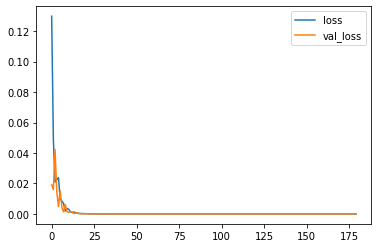

In [16]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [17]:
validation_target = Y[N//2:]
validation_predictions = []

i = -N//2

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1,-1))[0,0]
    i += 1
    validation_predictions.append(p)

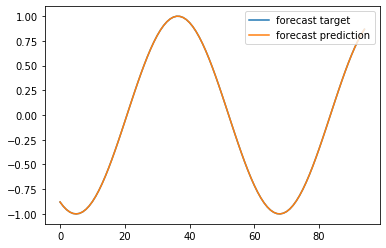

In [18]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [21]:
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1,-1))[0,0]
    
    validation_predictions.append(p)
    
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

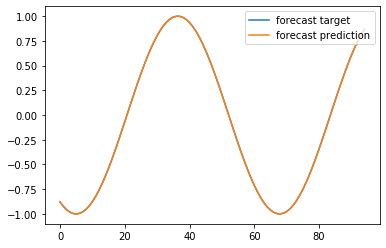

In [22]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [23]:
import filecmp as fc

In [37]:
    fc.cmp('/home/helong/share/temp/jdm/new/ae_tmo_tuning_custom_txd_s5k3l6.cpp','/home/helong/share/temp/jdm/old/ae_tmo_tuning_custom_txd_s5k3l6.cpp',shallow=False)

True

In [38]:
def list_all_files(rootdir):
    import os
    _files = []

    #列出文件夹下所有的目录与文件
    list_file = os.listdir(rootdir)
    
    for i in range(0,len(list_file)):

        # 构造路径
        path = os.path.join(rootdir,list_file[i])

        # 判断路径是否是一个文件目录或者文件
        # 如果是文件目录，继续递归
        
        if os.path.isdir(path):
            _files.extend(list_all_files(path))
        if os.path.isfile(path):
             _files.append(path)
    return _files



In [41]:
files = list_all_files('/home/helong/share/temp/jdm/305314/old/')
#print(len(files))
for i in range(0,len(files)):
    print(files[i])

/home/helong/share/temp/jdm/305314/old/mt6765/hal/camera_3a/ae_tmo_user/ae_tmo_tuning_custom_txd_s5k3l6.cpp
/home/helong/share/temp/jdm/305314/old/mt6765/hal/imgsensor/ver1/n21_txd_sub_s5k3l6_mipi_raw_tmo/AE_Tuning_Para/camera_ae_tuning_para_cap_n21_tmo_txd_sub_s5k3l6mipiraw.cpp
/home/helong/share/temp/jdm/305314/old/mt6765/hal/imgsensor/ver1/n21_txd_sub_s5k3l6_mipi_raw_tmo/AE_Tuning_Para/camera_ae_tuning_para_cus1_n21_tmo_txd_sub_s5k3l6mipiraw.cpp
/home/helong/share/temp/jdm/305314/old/mt6765/hal/imgsensor/ver1/n21_txd_sub_s5k3l6_mipi_raw_tmo/AE_Tuning_Para/camera_ae_tuning_para_vdo_n21_tmo_txd_sub_s5k3l6mipiraw.cpp
/home/helong/share/temp/jdm/305314/old/mt6765/hal/imgsensor/ver1/n21_txd_sub_s5k3l6_mipi_raw_tmo/AE_Tuning_Para/camera_ae_tuning_para_cus3_n21_tmo_txd_sub_s5k3l6mipiraw.cpp
/home/helong/share/temp/jdm/305314/old/mt6765/hal/imgsensor/ver1/n21_txd_sub_s5k3l6_mipi_raw_tmo/AE_Tuning_Para/camera_ae_tuning_para_pv_n21_tmo_txd_sub_s5k3l6mipiraw.cpp
/home/helong/share/temp/jdm/305

In [45]:
import subprocess

In [47]:
def init_p4_workspace():

    #echo "Initializing p4 workspace..."
    e=["Initializing p4 workspace..."]
    subprocess(e)
    p4 info
    if [ x"${PIPESTATUS[0]}" != x"0" ];then
        echo "Error: Perfoce environment not ready!"
        return 1
    fi
    P4_PROJECT_CODE_ROOT_DIR=`p4 info | grep "Client root:" | awk -F ': ' '{print$2}'`/android
    if [ x"${P4_PROJECT_CODE_ROOT_DIR}" == x"" ];then
        echo "Error: Perforce work dir is empty!"
        return 1
    fi
    if [ ! -d ${P4_PROJECT_CODE_ROOT_DIR} ];then
        echo "Error: Perforce work dir does not exist!"
        return 1
    fi
    echo ""
    echo "P4 is OK!"
    echo "P4 workspace root dir is ${P4_PROJECT_CODE_ROOT_DIR}"
    echo ""


SyntaxError: invalid syntax (<ipython-input-47-ad262074dc08>, line 6)

In [61]:
from subprocess import call
call('/home/helong/share/software/p4 info', shell=True)

1

In [58]:
call(['/home/helong/share/software/p4 info', 'I like potatos'])

0